In [29]:
#Author: Zoheen Shahzad
#oCR model


import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Input
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 

images = []
labels = []
 
path = 'C:/Users/Zoheen/Downloads/archive/data/training_data'
 
dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    images.append(img)
    labels.append(i)


X = np.array(images)
y = np.array(labels)





In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(f"shape of training data is: {X.shape}")
print(f"Labels: {y.shape}")

shape of training data is: (20628, 64, 64, 3)
Labels: (20628,)


In [31]:
from sklearn.utils import shuffle
X_sh, y_sh = shuffle(X, y, random_state=42)

In [33]:
model = Sequential()
model.add(Input(shape=(64, 64, 3)))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=16, epochs=10)

Epoch 1/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.5812 - loss: 1.5629 - val_accuracy: 0.9011 - val_loss: 0.3760
Epoch 2/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.9381 - loss: 0.2052 - val_accuracy: 0.9207 - val_loss: 0.2714
Epoch 3/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.9531 - loss: 0.1329 - val_accuracy: 0.9355 - val_loss: 0.2273
Epoch 4/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.9619 - loss: 0.1043 - val_accuracy: 0.9518 - val_loss: 0.1752
Epoch 5/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9707 - loss: 0.0744 - val_accuracy: 0.9445 - val_loss: 0.2096
Epoch 6/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.9686 - loss: 0.0854 - val_accuracy: 0.9493 - val_loss: 0.1759
Epoch 7/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9760 - loss: 0.0569 - val_accuracy: 0.9525 - val_loss: 0.1754
Epoch 8/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9779 -

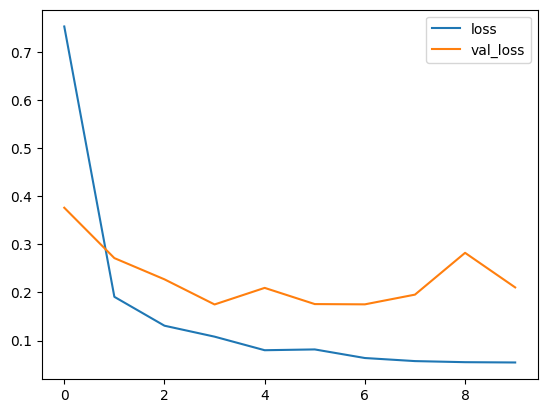

In [35]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [36]:
test_images = []
test_labels = []
 
path = 'C:/Users/Zoheen/Downloads/archive/data/testing_data'
 
dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    test_images.append(img)
    test_labels.append(i)

In [37]:
X_test = np.array(test_images)
y_test = np.array(test_labels)
print(f"Shape of testing images: {X_test.shape}")
print(f"Test labels: {y_test.shape}")

Shape of testing images: (1008, 64, 64, 3)
Test labels: (1008,)


In [38]:
preds = model.predict(X_test)
predicted_labels = le.inverse_transform(np.argmax(preds, axis=1))


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


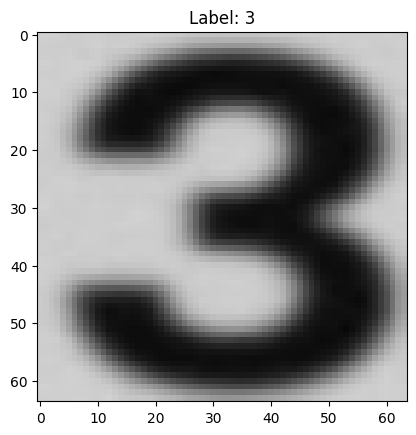

In [39]:
plt.imshow(X_test[100])
plt.title(f"Label: {predicted_labels[100]}")
plt.show()

In [40]:
y_test = le.fit_transform(y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9714 - loss: 0.0726
Test Accuracy: 0.9861111044883728
